# Quantitative Fundamental Analysis 1

Fundamental analysis (FA) is a method of measuring a security's intrinsic value by examining related economic and financial factors. Fundamental analysts study anything that can affect the security's value, from macroeconomic factors such as the state of the economy and industry conditions to microeconomic factors like the effectiveness of the company's management.The end goal is to arrive at a number that an investor can compare with a security's current price in order to see whether the security is undervalued or overvalued.

This method of stock analysis is considered to be in contrast to technical analysis, which forecasts the direction of prices through an analysis of historical market data such as price and volume.

## Quantitative FA

Quantitative fundamentals are hard numbers. They are the measurable characteristics of a business. That's why the biggest source of quantitative data is financial statements. Revenue, profit, assets, and more can be measured with great precision.

In [1]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

Now lets scrape wikipedia page to get all the ticker symbols of Dow Jones Industrial Average

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]
df

,Company name,Symbol,Sector[18],Date added[19]
0,Adani Enterprises,ADANIENT,Diversified,30 September 2022
1,Adani Ports & SEZ,ADANIPORTS,Infrastructure,28 September 2015
2,Apollo Hospitals,APOLLOHOSP,Healthcare,31 March 2022
3,Asian Paints,ASIANPAINT,Consumer Durables,27 April 2012
4,Axis Bank,AXISBANK,Banking,27 March 2009
5,Bajaj Auto,BAJAJ-AUTO,Automobile,1 October 2010
6,Bajaj Finance,BAJFINANCE,Financial Services,29 September 2017
7,Bajaj Finserv,BAJAJFINSV,Financial Services,2 April 2018
8,Bharat Petroleum,BPCL,Energy - Oil & Gas,28 October 2002
9,Bharti Airtel,BHARTIARTL,Telecommunication,1 March 2004


There are 30 stocks in the index and their respective tickers are listed which we are interest in.

In [8]:
tickers = df.Symbol.to_list() + ["ZOMATO"]
tickers = [t + ".NS" for t in tickers]
tickers

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LTIM.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS',
 'ZOMATO.NS']

Lets get fundamental information on these stocks using yahoofinance.

In [9]:
infos = []
for tick in tickers:
    infos.append(yf.Ticker(tick).info)

infos = pd.DataFrame(infos)

In [10]:
infos = infos.set_index('symbol')
infos

,address1,address2,city,zip,country,phone,fax,website,industry,industryKey,...,recommendationMean,numberOfAnalystOpinions,trailingAnnualDividendRate,trailingAnnualDividendYield,returnOnAssets,returnOnEquity,quickRatio,currentRatio,freeCashflow,operatingCashflow
symbol,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,Adani Corporate House,Shantigram Near Vaishnodevi Circle S. G. Highw...,Ahmedabad,382421,India,91 79 2555 5286,91 79 2555 5500,https://www.adanienterprises.com,Thermal Coal,thermal-coal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADANIPORTS.NS,Adani Corporate House,Shantigram Near Vaishnodevi Circle S G Highway,Ahmedabad,382421,India,91 79 2656 5555,91 79 2555 6490,https://www.adaniports.com,Marine Shipping,marine-shipping,...,1.8,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APOLLOHOSP.NS,Sunny Side Building,3rd Floor East Block No. 8/17 Shafee Mohammed ...,Chennai,600006,India,91 80 6999 1061,NaN,https://www.apollohospitals.com,Medical Care Facilities,medical-care-facilities,...,2.0,19.0,15.000,0.002497,NaN,NaN,NaN,NaN,NaN,NaN
ASIANPAINT.NS,Asian Paints House,"6A, Shantinagar",Mumbai,400055,India,91 22 6218 1000,91 22 6218 1111,https://www.asianpaints.com,Specialty Chemicals,specialty-chemicals,...,3.1,38.0,26.400,0.009230,NaN,NaN,NaN,NaN,NaN,NaN
AXISBANK.NS,Axis House,"C-2, Wadia International Centre Pandurang Budh...",Mumbai,400025,India,91 22 2425 2525,91 22 2425 1800,https://www.axisbank.com,Banks - Regional,banks-regional,...,NaN,NaN,NaN,NaN,0.01008,0.09492,NaN,NaN,NaN,NaN
BAJAJ-AUTO.NS,Mumbai-Pune Road,Akurdi,Pune,411035,India,91 20 6610 7868,91 20 2740 7380,https://www.bajajauto.com,Auto Manufacturers,auto-manufacturers,...,2.2,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAJFINANCE.NS,Panchshil Tech Park,3rd Floor Viman Nagar,Pune,411014,India,91 20 7157 6403,91 20 2748 4486,https://www.bajajfinserv.in/corporate-bajaj-fi...,Credit Services,credit-services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAJAJFINSV.NS,Bajaj Finserv Corporate Office,6th Floor Off Pune-Ahmednagar Road Viman Nagar,Pune,411014,India,91 20 7150 5700,91 20 7150 5792,https://www.bajajfinserv.in,Financial Conglomerates,financial-conglomerates,...,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPCL.NS,Bharat Bhavan,4 & 6 Currimbhoy Road Ballard Estate PB No. 688,Mumbai,400001,India,91 22 2271 3000,91 22 2271 3874,https://www.bharatpetroleum.in,Oil & Gas Refining & Marketing,oil-gas-refining-marketing,...,2.5,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have the basic fundamental data about the stocks in the DOW jones industrial average. Lets figure out the columns that are interesting for analysis.

In [11]:
for col in infos.columns:
    print(col)

address1
address2
city
zip
country
phone
fax
website
industry
industryKey
industryDisp
sector
sectorKey
sectorDisp
longBusinessSummary
fullTimeEmployees
companyOfficers
auditRisk
boardRisk
compensationRisk
shareHolderRightsRisk
overallRisk
governanceEpochDate
compensationAsOfEpochDate
maxAge
priceHint
previousClose
open
dayLow
dayHigh
regularMarketPreviousClose
regularMarketOpen
regularMarketDayLow
regularMarketDayHigh
dividendRate
dividendYield
exDividendDate
payoutRatio
fiveYearAvgDividendYield
beta
trailingPE
volume
regularMarketVolume
averageVolume
averageVolume10days
averageDailyVolume10Day
bid
ask
marketCap
fiftyTwoWeekLow
fiftyTwoWeekHigh
priceToSalesTrailing12Months
fiftyDayAverage
twoHundredDayAverage
currency
enterpriseValue
profitMargins
floatShares
sharesOutstanding
heldPercentInsiders
heldPercentInstitutions
impliedSharesOutstanding
bookValue
priceToBook
lastFiscalYearEnd
nextFiscalYearEnd
mostRecentQuarter
earningsQuarterlyGrowth
netIncomeToCommon
trailingEps
lastSplitFac

In [12]:
fundamental = ['industry','operatingCashflow','ebitda','freeCashflow','pegRatio','earningsGrowth', 'currentRatio','debtToEquity','returnOnEquity','totalCash','totalDebt','quickRatio','beta3Year','beta','forwardEps','priceToBook','priceToSalesTrailing12Months','forwardPE','dividendRate','trailingPE','marketCap','dividendYield']
#lets filter out the fundamental data 
fund_info = infos[infos.columns[infos.columns.isin(fundamental)]]
fund_info

,industry,dividendRate,dividendYield,beta,trailingPE,marketCap,priceToSalesTrailing12Months,priceToBook,totalCash,ebitda,...,debtToEquity,earningsGrowth,forwardPE,forwardEps,pegRatio,returnOnEquity,quickRatio,currentRatio,freeCashflow,operatingCashflow
symbol,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,Thermal Coal,1.20,0.0004,0.842,99.188576,3483840020480,3.236620,10.224155,84126498816,1.112123e+11,...,136.906,1.298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADANIPORTS.NS,Marine Shipping,5.00,0.0041,0.567,37.426870,2708496449536,10.575557,7.011755,70454099968,1.475384e+11,...,99.596,0.678,37.516460,33.42,1.03,NaN,NaN,NaN,NaN,NaN
APOLLOHOSP.NS,Medical Care Facilities,15.00,0.0025,0.552,111.079000,873321267200,4.741801,13.416121,14314000384,2.060975e+10,...,71.084,0.599,74.433820,81.60,0.65,NaN,NaN,NaN,NaN,NaN
ASIANPAINT.NS,Specialty Chemicals,26.40,0.0092,0.291,50.936783,2765827604480,7.793081,16.702084,39988899840,7.531220e+10,...,13.545,0.349,102.144130,28.24,NaN,NaN,NaN,NaN,NaN,NaN
AXISBANK.NS,Banks - Regional,1.00,0.0009,0.886,24.931572,3316553613312,5.328079,2.220404,559324397568,NaN,...,NaN,0.053,NaN,NaN,NaN,0.09492,NaN,NaN,NaN,NaN
BAJAJ-AUTO.NS,Auto Manufacturers,140.00,0.0167,0.893,32.028595,2372765220864,5.484090,8.082182,54729400320,9.227678e+10,...,NaN,0.380,48.937040,171.22,NaN,NaN,NaN,NaN,NaN,NaN
BAJFINANCE.NS,Credit Services,30.00,0.0046,0.936,28.512634,3979293229056,13.187572,6.512633,76568903680,NaN,...,336.941,0.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAJAJFINSV.NS,Financial Conglomerates,0.80,0.0005,1.012,32.454075,2503418052608,2.490423,4.927378,81924898816,3.734055e+11,...,231.603,0.196,31.823519,49.41,1.78,NaN,NaN,NaN,NaN,NaN
BPCL.NS,Oil & Gas Refining & Marketing,25.00,0.0418,1.001,4.429486,1301992964096,0.289561,1.806378,233244803072,4.514604e+11,...,79.365,0.822,9.576904,62.87,-0.14,NaN,NaN,NaN,NaN,NaN


Now we are ready to compare stocks in DOW JONES based on their fundamental data.

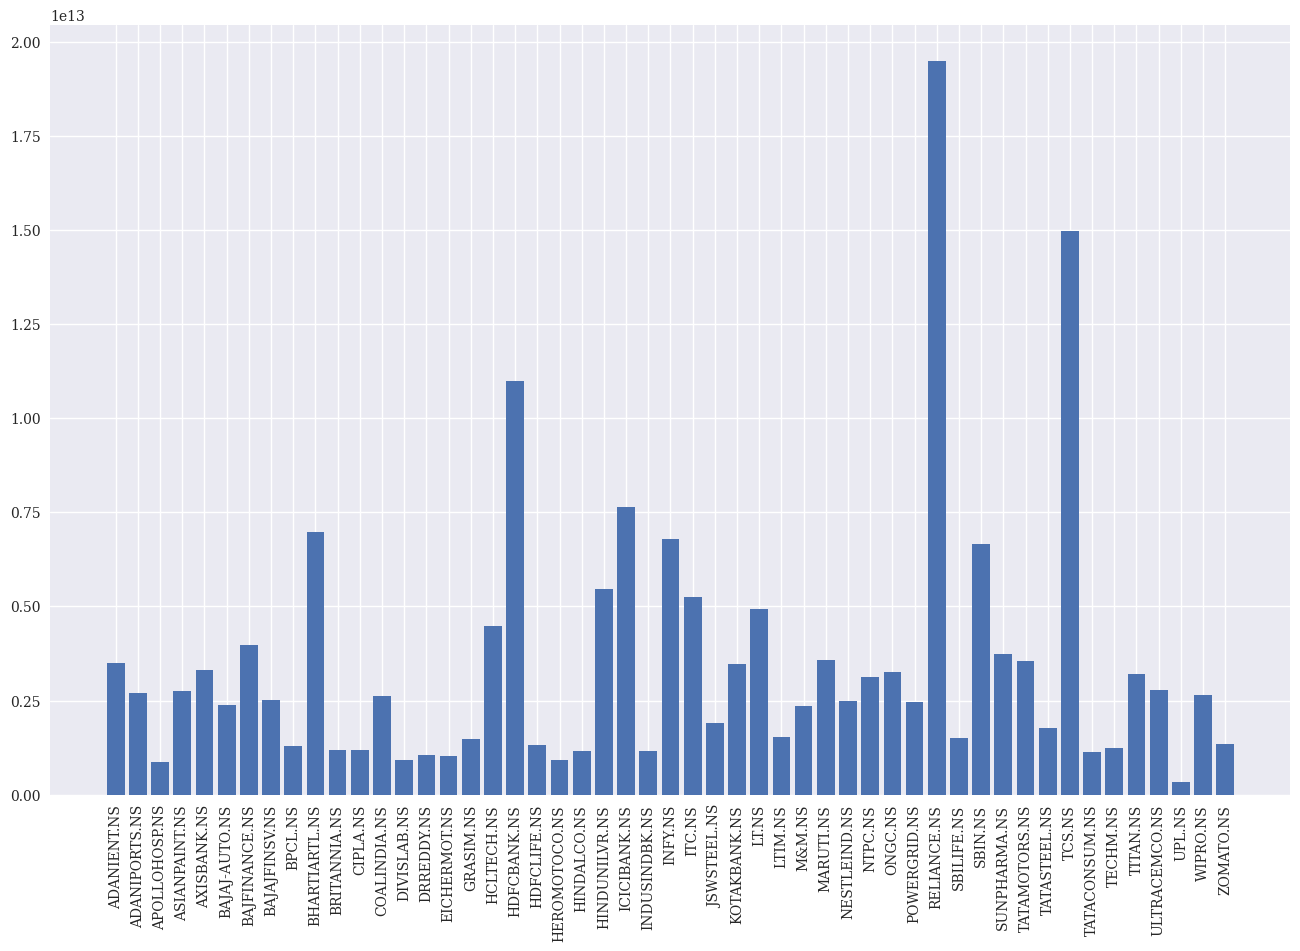

In [13]:
#First let plot out the companies with the biggest market cap
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['marketCap'])
plt.xticks(rotation = 90)
plt.show()

In [14]:
fund_info['marketCap'].nlargest(10)

symbol
RELIANCE.NS      19477261451264
TCS.NS           14978530672640
HDFCBANK.NS      10993827577856
ICICIBANK.NS      7643675492352
BHARTIARTL.NS     6975563759616
INFY.NS           6780435824640
SBIN.NS           6652850339840
HINDUNILVR.NS     5470215995392
ITC.NS            5252839374848
LT.NS             4943031828480
Name: marketCap, dtype: int64

As suspected technology stocks are the top 2 then healthcare dominates which is also not suprising given the past few years.

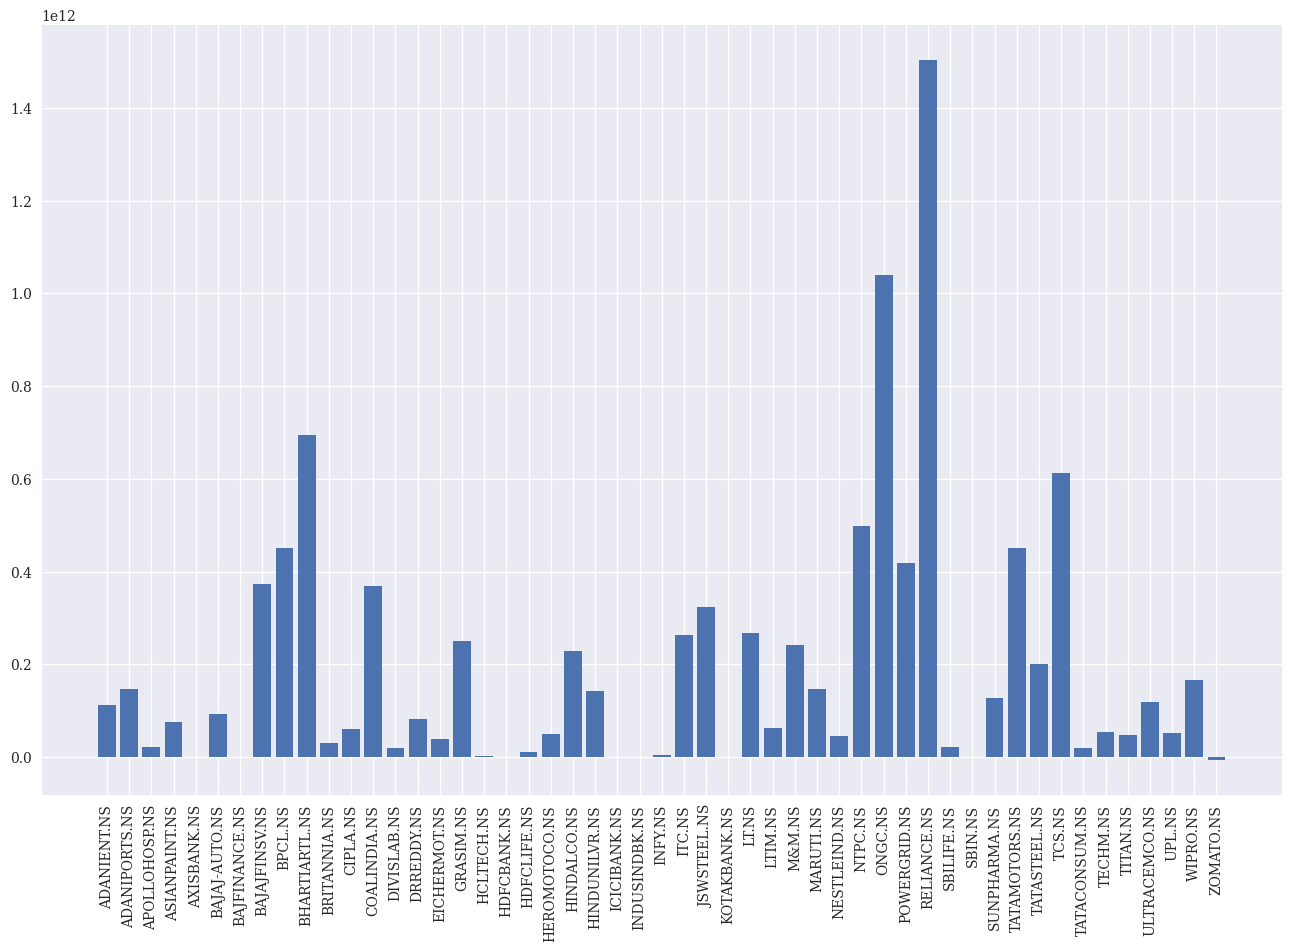

In [15]:
##First let plot out the companies with the biggest ebita
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['ebitda'])
plt.xticks(rotation = 90)
plt.show()

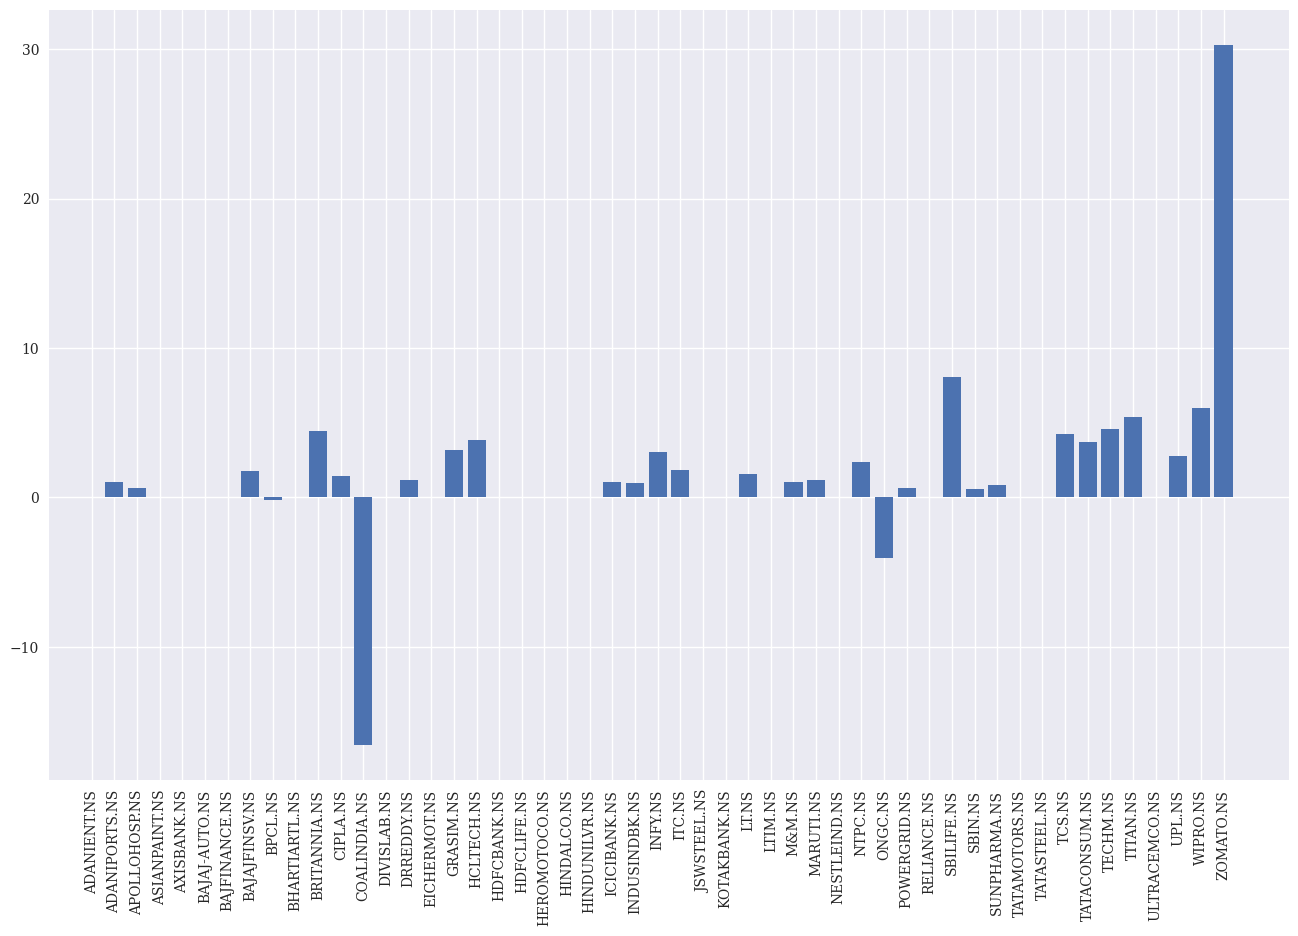

In [16]:
##First let plot out the companies with the biggest pegratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['pegRatio'])
plt.xticks(rotation = 90)
plt.show()

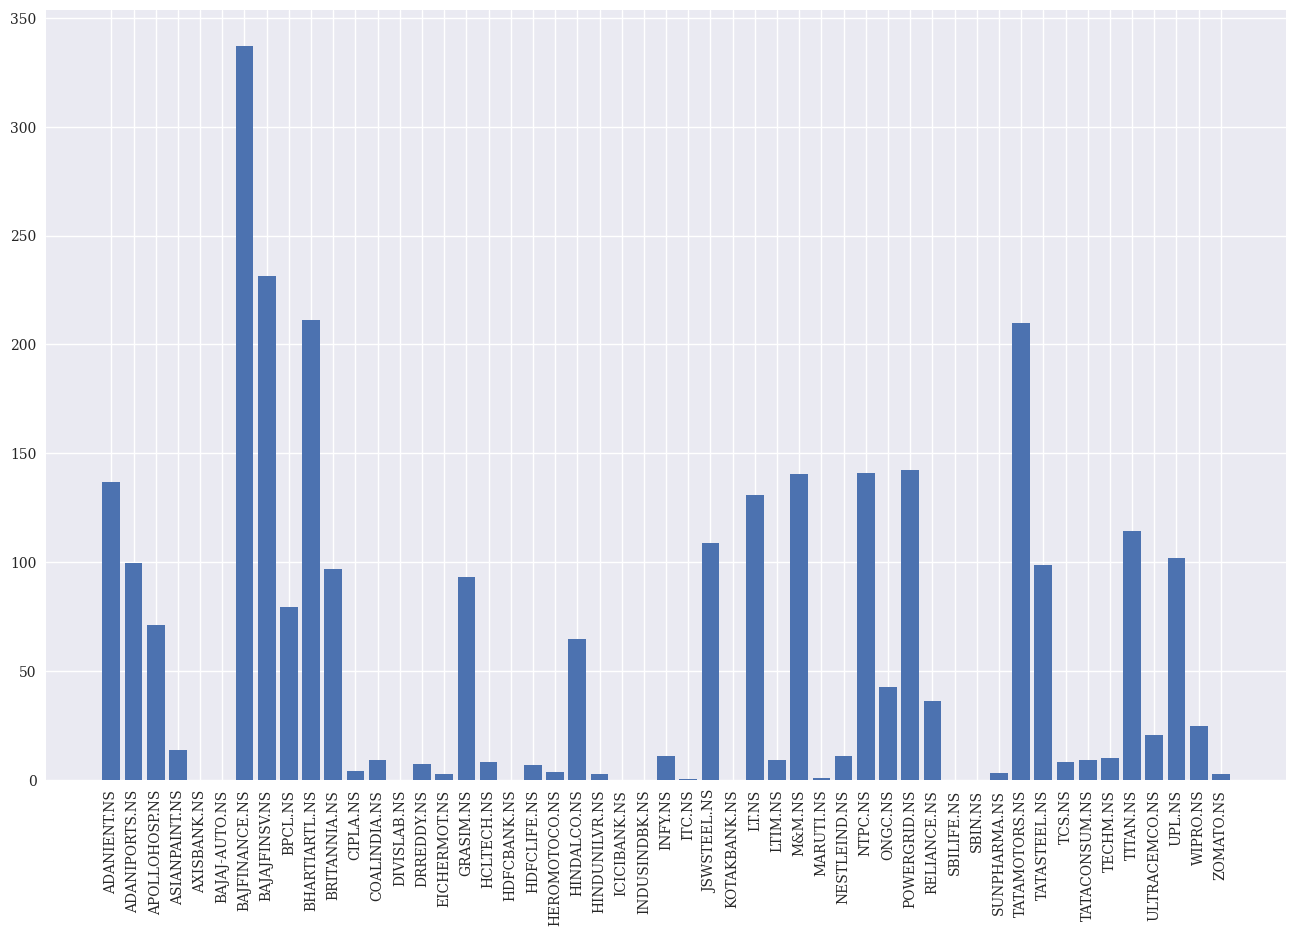

In [17]:
##First let plot out the companies with the biggest debt to equity ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['debtToEquity'])
plt.xticks(rotation = 90)
plt.show()

Woow Amgen is what you call being leveraged to its tits. Hope this is a data glitch rather than actual leverage.

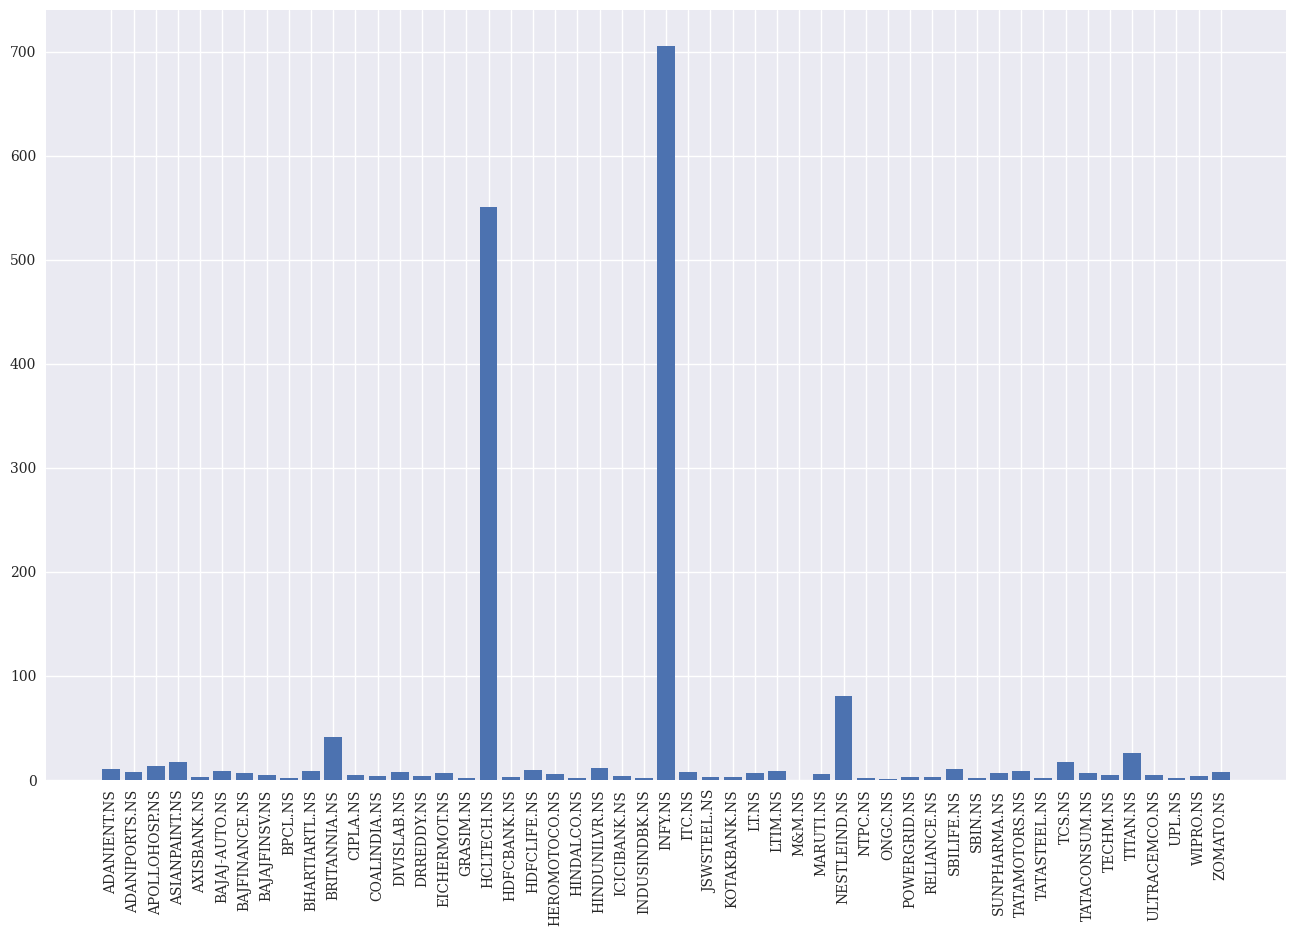

In [18]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['priceToBook'])
plt.xticks(rotation = 90)
plt.show()

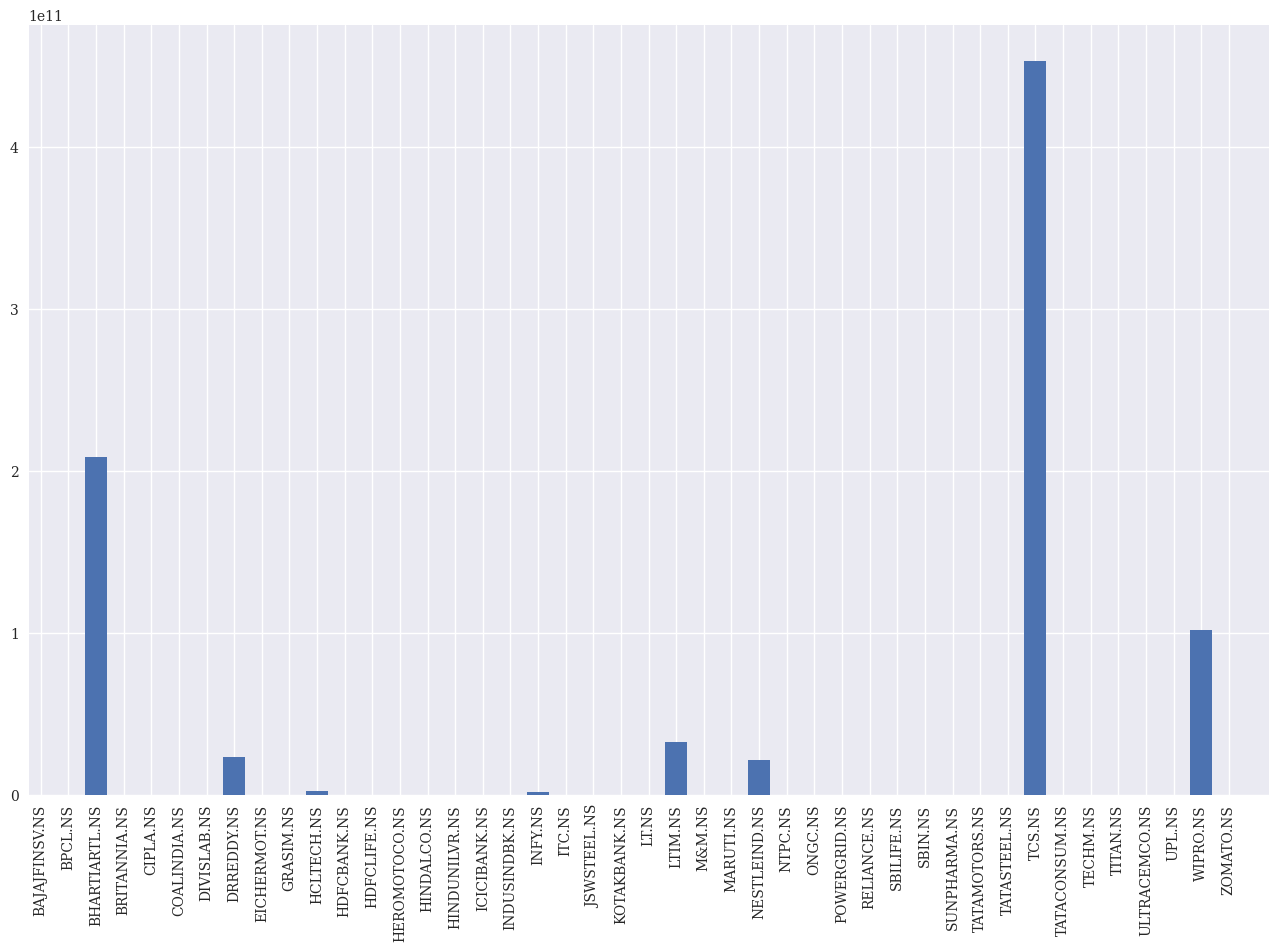

In [19]:

##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['freeCashflow'])
plt.xticks(rotation = 90)
plt.show()

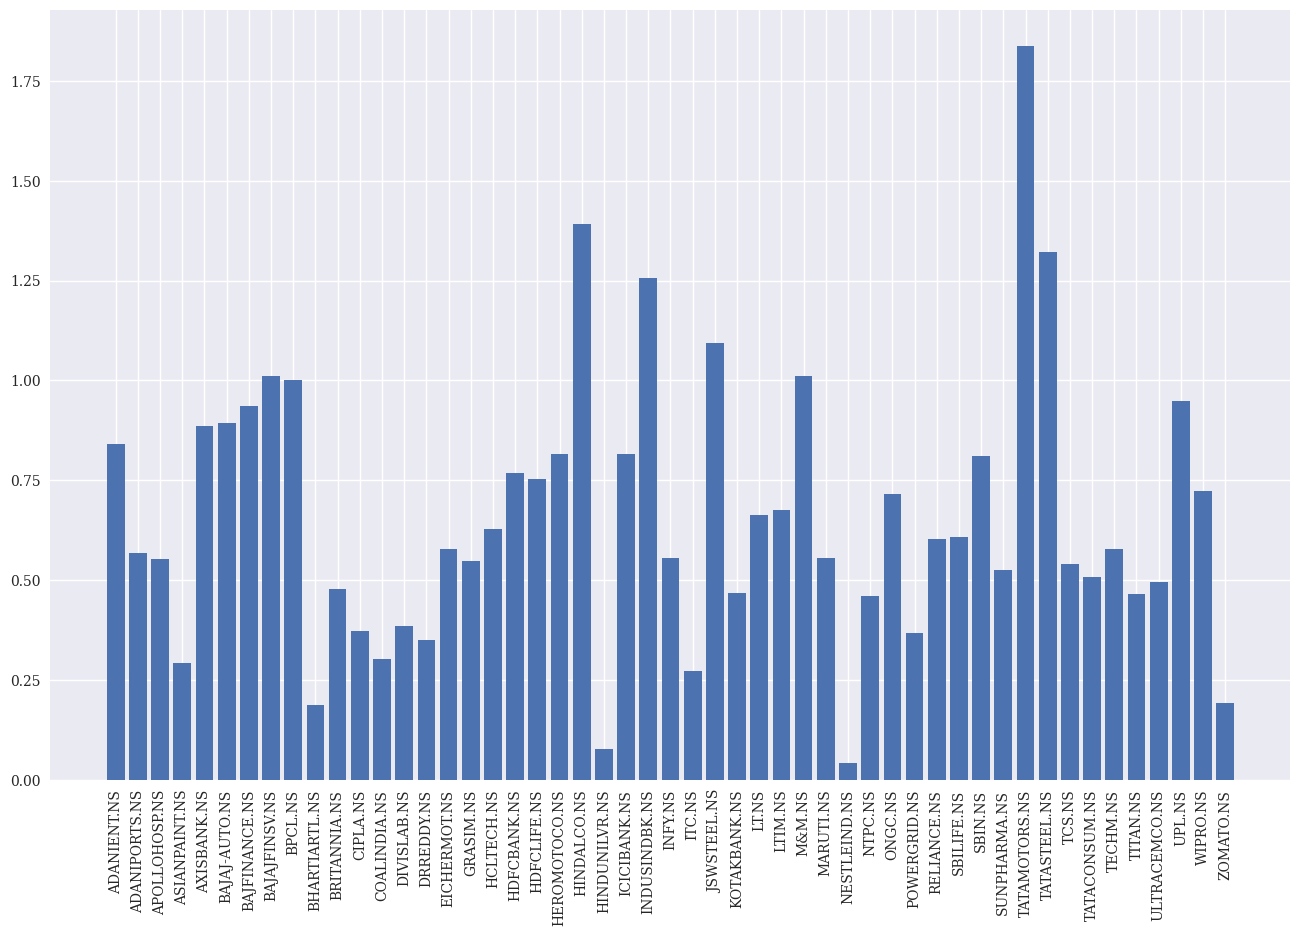

In [20]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['beta'])
plt.xticks(rotation = 90)
plt.show()

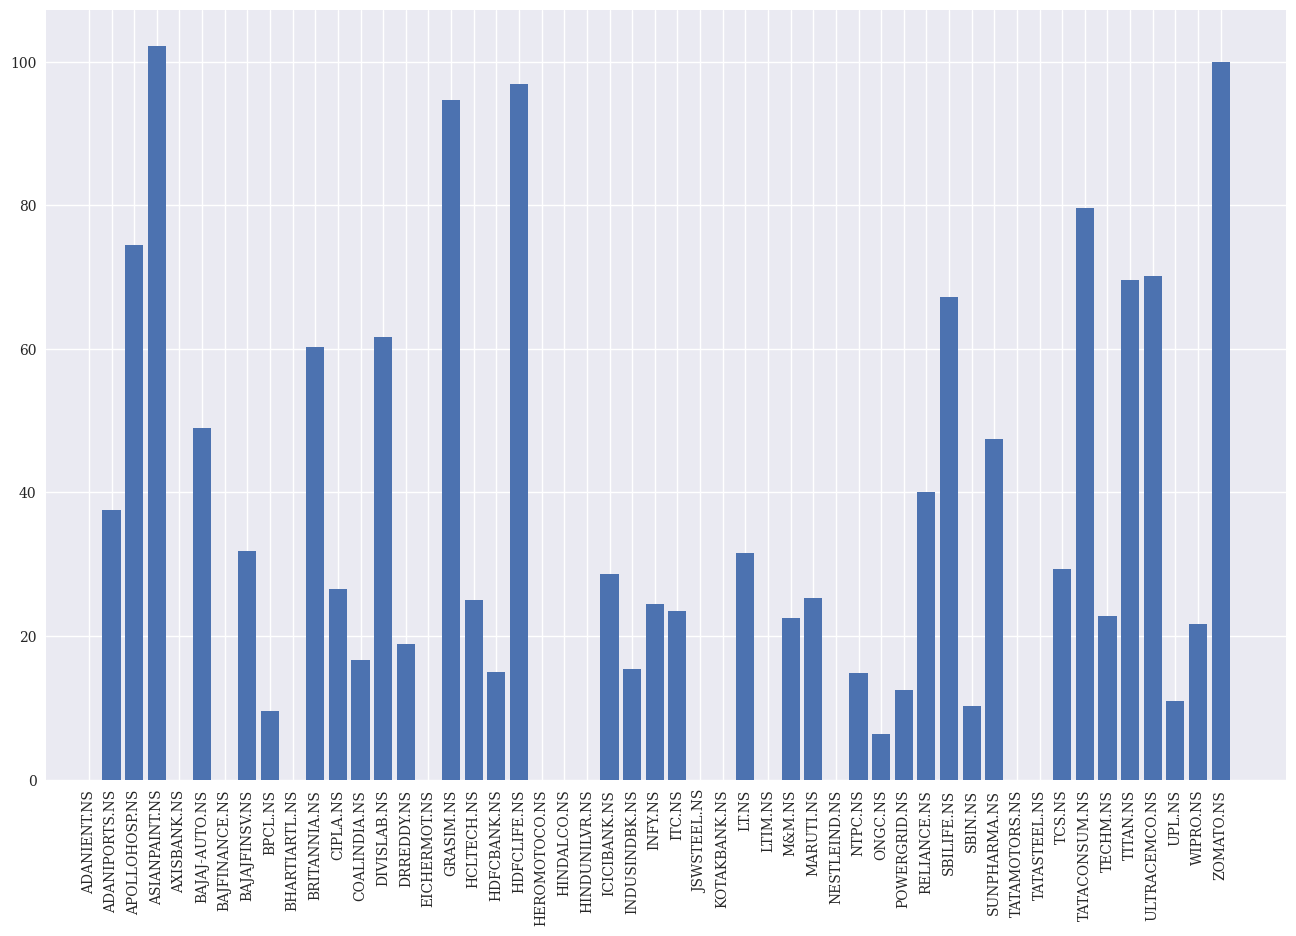

In [21]:

plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['forwardPE'])
plt.xticks(rotation = 90)
plt.show()

## Balance sheet analysis and scoring stocks based on Piotroski F-score.

### What Is the Piotroski Score?

The Piotroski score is a discrete score between zero and nine that reflects nine criteria used to determine the strength of a firm's financial position. The Piotroski score is used to determine the best value stocks, with nine being the best and zero being the worst.

In [22]:
import yahoo_fin.stock_info as yfi
import time
# import yahoofinance as yf

In [23]:
balance_sheet = []
income_statement = []
cfs = []
years = []
profitability_score = 0
leverage_score = 0
operating_efficiency_score = 0
pe_ratio = 0

In [24]:
summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])

### Understanding the Piotroski Score

The Piotroski score is broken down into the following categories:
- Profitability
- Leverage, liquidity, and source of funds
- Operating efficiency

Profitability Criteria Include
- Positive net income (1 point)
- Positive return on assets (ROA) in the current year (1 point)
- Positive operating cash flow in the current year (1 point)
- Cash flow from operations being greater than net Income (quality of earnings) (1 point)

Leverage, Liquidity, and Source of Funds Criteria Include:
- Lower amount of long term debt in the current period, compared to the previous year (decreased leverage) (1 point)
- Higher current ratio this year compared to the previous year (more liquidity) (1 point)
- No new shares were issued in the last year (lack of dilution) (1 point).

Operating Efficiency Criteria Include:
- A higher gross margin compared to the previous year (1 point)
- A higher asset turnover ratio compared to the previous year (1 point)

In [25]:
def get_data(ticker):
    global balance_sheet
    global income_statement
    global cfs
    global years
    ticker = yf.Ticker(ticker)
    balance_sheet = ticker.balance_sheet
    income_statement = ticker.income_stmt
    cfs = ticker.cashflow
    years = balance_sheet.columns

def pe(ticker):
    global pe_ratio
    pe_ratio = yfi.get_quote_table(ticker)['PE Ratio (TTM)']
    if pe_ratio != pe_ratio: #Check if NaN
        pe_ratio = 0   

def profitability():
    global profitability_score
    #Scores #1 and 2 - net income
    net_income = income_statement[years[0]]['Net Income']
    net_income_py = income_statement[years[1]]['Net Income']
    ni_score = 1 if net_income > 0 else 0
    ni_score_2 = 1 if net_income > net_income_py else 0

    #Score #3 - operating cash flow
    op_cf = cfs[years[0]]['Operating Cash Flow']
    op_cf_score = 1 if op_cf > 0 else 0

    #Score #4 - change in RoA
    avg_assets = (balance_sheet[years[0]]['Total Assets']
                    + balance_sheet[years[1]]['Total Assets']) / 2
    avg_assets_py = (balance_sheet[years[1]]['Total Assets']
                    + balance_sheet[years[2]]['Total Assets']) / 2
    RoA = net_income / avg_assets
    RoA_py = net_income_py / avg_assets_py
    RoA_score = 1 if RoA > RoA_py else 0

    #Score #5 - Accruals
    total_assets = balance_sheet[years[0]]['Total Assets']
    accruals = op_cf / total_assets - RoA
    ac_score = 1 if accruals > 0 else 0

    profitability_score = ni_score + ni_score_2 + op_cf_score + RoA_score + ac_score

def leverage():
    global leverage_score
    #Score #6 - long-term debt ratio
    try:
        lt_debt = balance_sheet[years[0]]['Long Term Debt']
        total_assets = balance_sheet[years[0]]['Total Assets']
        debt_ratio = lt_debt / total_assets
        debt_ratio_score = 1 if debt_ratio < 0.4 else 0
    except:
        debt_ratio_score = 1

    #Score #7 - Current ratio
    current_assets = balance_sheet[years[0]]['Current Assets']
    current_liab = balance_sheet[years[0]]['Current Liabilities']
    current_ratio = current_assets / current_liab
    current_ratio_score = 1 if current_ratio > 1 else 0

    leverage_score = debt_ratio_score + current_ratio_score

def operating_efficiency():
    global operating_efficiency_score
    #Score #8 - Gross margin
    gp = income_statement[years[0]]['Gross Profit']
    gp_py = income_statement[years[1]]['Gross Profit']
    revenue = income_statement[years[0]]['Total Revenue']
    revenue_py = income_statement[years[1]]['Total Revenue']
    gm = gp / revenue
    gm_py = gp_py / revenue_py
    gm_score = 1 if gm > gm_py else 0
    
    #Score #9 - Asset turnover
    avg_assets = (balance_sheet[years[0]]['Total Assets']
                    + balance_sheet[years[1]]['Total Assets']) / 2
    avg_assets_py = (balance_sheet[years[1]]['Total Assets']
                    + balance_sheet[years[2]]['Total Assets']) / 2

    at = revenue / avg_assets #at = asset turnover
    at_py = revenue_py / avg_assets_py
    at_score = 1 if at > at_py else 0

    operating_efficiency_score = gm_score + at_score

In [26]:
for ticker in tickers:
    try:
        get_data(ticker)
        pe(ticker)
        profitability()
        leverage()
        operating_efficiency()
        new_row = {'Ticker': ticker,
                    'PE ratio': pe_ratio,
                    'Profitability': profitability_score,
                    'Leverage': leverage_score,
                    'Operating eficiency': operating_efficiency_score}

        summary = summary.append(new_row, ignore_index = True)
        print(ticker + ' added.')
        time.sleep(1)
    except Exception as e:
        print(ticker + ': Something went wrong.')
        print(str(e))
summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
summary

c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ADANIENT.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ADANIPORTS.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


APOLLOHOSP.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ASIANPAINT.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


AXISBANK.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


BAJAJ-AUTO.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


BAJFINANCE.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


BAJAJFINSV.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


BPCL.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


BHARTIARTL.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


BRITANNIA.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


CIPLA.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


COALINDIA.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


DIVISLAB.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


DRREDDY.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


EICHERMOT.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


GRASIM.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


HCLTECH.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


HDFCBANK.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


HDFCLIFE.NS: Something went wrong.
'Operating Cash Flow'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


HEROMOTOCO.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


HINDALCO.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


HINDUNILVR.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


ICICIBANK.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


INDUSINDBK.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


INFY.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ITC.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


JSWSTEEL.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


KOTAKBANK.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


LT.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


LTIM.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


M&M.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


MARUTI.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


NESTLEIND.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


NTPC.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ONGC.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


POWERGRID.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


RELIANCE.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


SBILIFE.NS: Something went wrong.
'Operating Cash Flow'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


SBIN.NS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


SUNPHARMA.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


TATAMOTORS.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


TATASTEEL.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


TCS.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


TATACONSUM.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


TECHM.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


TITAN.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ULTRACEMCO.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


UPL.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


WIPRO.NS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_18872\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ZOMATO.NS added.


,Ticker,PE ratio,Profitability,Leverage,Operating eficiency,Total score
0,ADANIENT.NS,99.14,5,1,2,8
1,ADANIPORTS.NS,37.43,4,1,0,5
2,APOLLOHOSP.NS,110.93,3,2,1,6
3,ASIANPAINT.NS,50.94,4,2,2,8
4,BAJAJ-AUTO.NS,32.03,2,2,2,6
5,BPCL.NS,4.43,3,1,1,5
6,BHARTIARTL.NS,81.40,5,1,2,8
7,BRITANNIA.NS,54.61,4,2,2,8
8,CIPLA.NS,32.08,5,2,1,8
9,COALINDIA.NS,8.88,5,2,2,9


A company that has Piotroski F-score of 8–9 is considered to be strong. Alternatively, firms achieving the F-score of 0–2 are considered to be weak. 

In [27]:
summary.sort_values(by = 'Total score', ascending = False)

,Ticker,PE ratio,Profitability,Leverage,Operating eficiency,Total score
9,COALINDIA.NS,8.88,5,2,2,9
0,ADANIENT.NS,99.14,5,1,2,8
11,DRREDDY.NS,20.01,5,1,2,8
29,RELIANCE.NS,27.67,4,2,2,8
21,LT.NS,39.57,5,2,1,8
30,SUNPHARMA.NS,41.81,4,2,2,8
19,ITC.NS,25.62,4,2,2,8
31,TATAMOTORS.NS,19.12,5,1,2,8
15,HEROMOTOCO.NS,25.59,4,2,2,8
14,HCLTECH.NS,28.49,5,2,1,8
